In [1]:
import pandas as pd
import numpy as np
import datetime as d
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from a1_scrapping_data import *
from a2_extra_useful_columns_functions import *

df_regression= pd.DataFrame()

for i in seasons_dict:
    df_regression=pd.concat([df_regression, seasons_dict[i]['general_table']])
    
df_regression.reset_index(inplace= True, drop= True)
df_regression['xGDGAD/90']= df_regression['xG/90']-df_regression['xGA/90']

y= df_regression.Rk
x= df_regression['xGDGAD/90'].values.reshape(-1,1)

model= LinearRegression().fit(x,y)
r_sq= model.score(x,y)
intercept= model.intercept_
slope= model.coef_
y_pred= intercept + slope*x


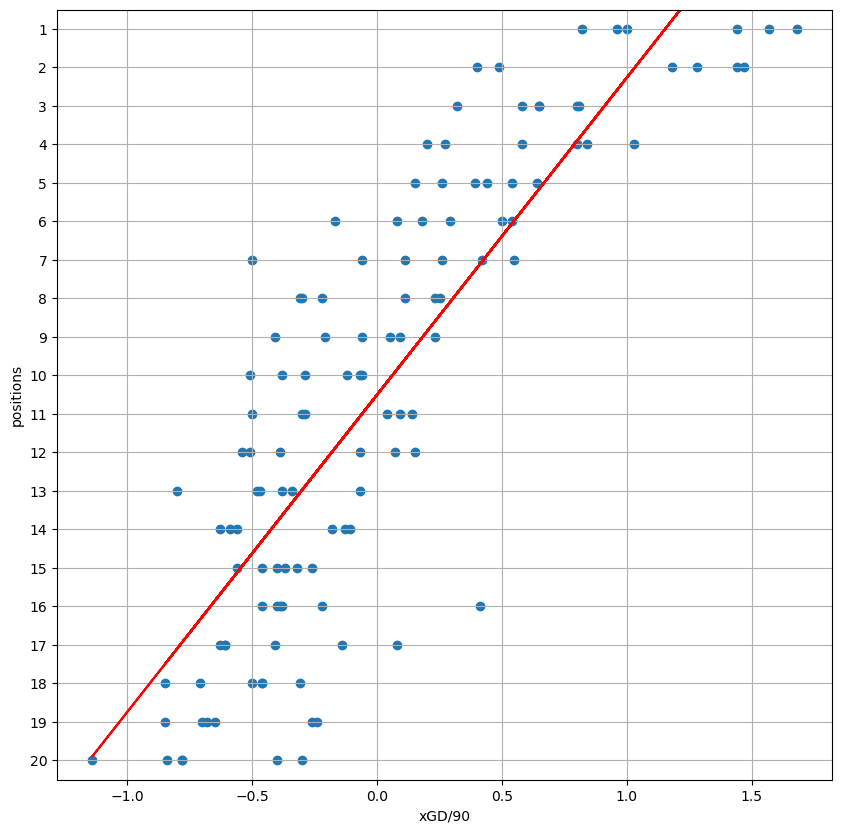

In [2]:
fig, ax= plt.subplots(figsize=(10,10))
plt.scatter(x,y)
plt.plot(x, y_pred, color= 'red')

plt.ylim(.5,20.5)
plt.yticks(np.arange(1, 21, step=1))
plt.gca().invert_yaxis()
plt.xlabel('xGD/90')
plt.ylabel('positions')
plt.grid(visible= True)
plt.savefig(r"xGD_linear_regression.png", dpi = 500)

In [3]:
r_sq

0.704950233772964